# PCA 
___

In this notebook, I do principle component analysis to see what the weights are on our features to see if there is a pattern. I will also fit a linear regression model and see how it does.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

/Users/tannerzuleeg/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
df = pd.read_csv('../datasets/1860_no_null.csv')
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df = df.set_index('country')
df.head()

,iso,year,CPI,trade_balance_perc_of_gdp,life_expectancy,journos_imprisoned_yearly,inflation_annual_perc,gini_index,democracy_index,childmor_0_5_per_1000,...,linguistic_div_index,religious_div_index,rural_population_ratio,unemployment_perc_tot_labor,pop_percent_with_sanitation,undernourishment_prevalence_perc,population,gdp_per_capita_2017dollar,fertility_rate,electricity_access
country,,,,,,,,,,,,,,,,,,,,,
Finland,FIN,2006,96.0,4.160,79.6,86.1,0.921,28.0,92.5,3.64,...,0.1412,0.2531,16.963,7.72,99.448135,2.5,5266249.0,46412.200,1.84,100.0
Iceland,ISL,2006,96.0,-16.700,81.7,79.6,8.620,30.3,97.1,3.07,...,0.0820,0.1913,6.841,2.83,98.790146,2.5,304086.0,49956.848,2.09,100.0
New Zealand,NZL,2006,96.0,-0.386,80.0,87.5,2.690,32.5,90.1,6.46,...,0.1657,0.8110,13.600,3.86,100.000000,2.5,4179986.0,37828.188,2.09,100.0
Denmark,DNK,2006,95.0,4.090,78.5,87.8,2.080,25.9,95.2,4.65,...,0.1049,0.2333,13.902,3.90,99.597240,2.5,5457863.0,53322.290,1.85,100.0
Sweden,SWE,2006,92.0,6.780,81.1,91.3,1.760,26.4,98.8,3.45,...,0.1968,0.2342,15.570,7.07,99.063050,2.5,9104724.0,47292.312,1.87,100.0


In [4]:
data = df.drop(columns = ['year', 'iso', 'CPI'])

scaler = StandardScaler()
X = scaler.fit_transform(data)

pca = PCA(random_state = 42)
Z = pca.fit_transform(X)

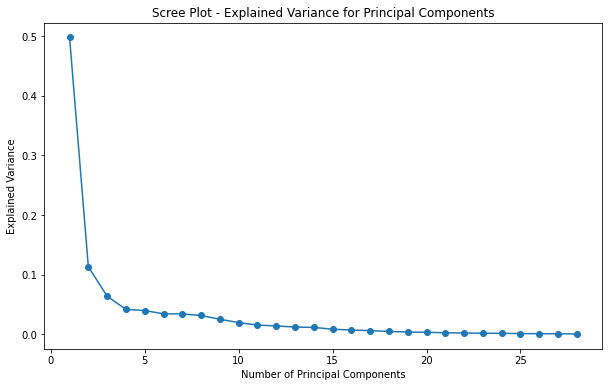

In [5]:
# We see an elbow there at 4 principle components 
var_exp = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(var_exp) + 1), var_exp, marker='o')
plt.title('Scree Plot - Explained Variance for Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.savefig('../images/04_1_scree')
plt.show()

In [6]:
# Save the coefficients on our features in the principle components as a dataframe
data = df.drop(columns=['year', 'iso', 'CPI'])

scaler = StandardScaler()
X = scaler.fit_transform(data)

pca = PCA(random_state=42)
Z = pca.fit_transform(X)

feature_names = data.columns

components_df = pd.DataFrame(pca.components_.T, index=feature_names, columns=[f"Component_{i+1}" for i in range(pca.n_components_)])

components_df

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,Component_19,Component_20,Component_21,Component_22,Component_23,Component_24,Component_25,Component_26,Component_27,Component_28
trade_balance_perc_of_gdp,-0.095498,0.096481,0.479299,-0.158512,-0.062950,0.109176,-0.111715,0.442854,0.163587,0.014528,...,-0.042956,-0.042133,0.060169,-0.020032,0.053860,-0.031073,-0.012555,-0.064924,0.008047,0.020618
life_expectancy,-0.230914,0.162070,-0.012181,0.064449,-0.033409,-0.121019,0.080561,0.077068,-0.030890,0.221975,...,-0.093139,0.181780,0.028197,0.305034,0.270489,0.178225,0.166380,0.137794,0.124336,-0.017203
journos_imprisoned_yearly,-0.180720,-0.265738,-0.235993,0.032110,-0.012522,-0.222441,0.236696,0.194290,-0.004016,0.137015,...,-0.056865,0.127697,0.153650,0.317734,-0.331503,-0.293055,-0.226167,0.037078,0.045485,-0.238626
inflation_annual_perc,0.075486,0.095255,0.007895,-0.065258,-0.012822,0.501077,0.759309,0.229539,-0.024906,-0.250344,...,-0.052711,0.014490,-0.033699,0.031913,0.012740,0.030638,-0.008814,-0.011928,0.008422,0.000486
gini_index,0.123989,-0.149084,-0.245393,-0.266686,0.114324,0.005651,-0.286628,0.542815,-0.225193,-0.245908,...,-0.160256,-0.037738,0.014486,0.017195,-0.018614,0.036813,0.045183,0.009029,-0.063003,0.016431
democracy_index,-0.215426,-0.229738,-0.174218,0.111476,0.055143,-0.136026,0.146956,0.155399,0.025487,-0.000813,...,0.233624,0.013817,-0.194168,-0.538624,0.384393,0.179099,0.132386,-0.021232,-0.014215,-0.394134
childmor_0_5_per_1000,0.222217,-0.222991,0.111995,0.086928,-0.072545,0.058408,-0.046472,-0.012181,0.120106,0.008769,...,-0.137318,0.033245,0.091901,0.406449,0.338049,0.474312,0.154880,0.091188,0.064553,-0.071140
cellphone_per_100,-0.171674,0.139090,0.029203,-0.282152,-0.012843,-0.307475,-0.085067,-0.037155,-0.129734,-0.502133,...,-0.065832,-0.010463,0.062825,0.023648,0.061624,0.050690,-0.007577,0.008175,0.006215,-0.019247
avrg_daily_income,-0.227633,-0.060121,0.261622,-0.008140,-0.063415,0.151130,-0.085981,-0.002442,-0.007911,0.161576,...,0.120827,0.183987,0.107983,-0.021368,0.052061,0.102785,-0.333888,-0.599964,0.008616,-0.039581
gender_inequality_ind,0.242213,-0.067680,-0.052842,0.013060,-0.073153,-0.114623,-0.010451,0.182039,0.044232,-0.013619,...,0.566877,0.461210,0.060888,0.135459,0.159537,-0.187941,-0.126792,0.072227,0.143321,0.043319


In [7]:
# Drop non numeric features, target variable (CPI) and other features which are highly correlated with other predictors
X = df.drop(columns = ['iso', 'year', 'CPI', 'control_of_corruption', 'government_effectiveness','regulatory_quality', 
                       'rule_of_low', 'voice_and_accountability', 'journos_imprisoned_yearly', 'gdp_per_capita_2017dollar', 
                       'electricity_access'])
y = df['CPI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('regression', LinearRegression())
])

param_grid = {'pca__n_components': [3, 4, 5, 6 ,7, 8, 12, 20]}

grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

print("Best number of principal components:", grid_search.best_params_['pca__n_components'])

pipeline_f = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=20)),
    ('regression', LinearRegression())
])

pipeline_f.fit(X_train, y_train)
print(f'20 components {pipeline_f.score(X_test, y_test)}')

# And now if we only want 4 components 

pipeline_g = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=4)),
    ('regression', LinearRegression())
])

pipeline_g.fit(X_train, y_train)
print(f'4 components is {pipeline_g.score(X_test, y_test)}')

Best number of principal components: 20
20 components 0.8346752496524082
4 components is 0.7293237927312305


## Key Takeaways

As observed above, employing the optimal number of principal components yields a model score of only 0.73, while using the maximum number of components (20) results in a model score of 0.83. These performances are not considered very good.

Upon inspecting the dataframe displaying the coefficients for our principal components, it is challenging to extract information about the underlying relationships between our predictors and principal features.